비지도 학습 : 머신러닝의 미래, 언제 어디서나 사용 가능
- 입력데이터(X)만 존재, 출력(Y) 없음

In [2]:
#p 221  10개의 숫자 이미지  OCR(Optical광학 Character 글자 Recognization 인식)
# 비지도학습으로 숫자 인식을 할 수 있습니다

In [1]:
#221
from sklearn.datasets import load_digits #digits 숫자

In [2]:
digits = load_digits()

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.target.shape # Y 예측 목표(타겟)

(1797,)

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.images.shape

(1797, 8, 8)

In [7]:
import matplotlib.pyplot as plt

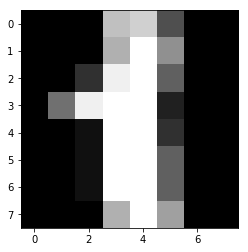

In [37]:
plt.imshow(digits.images[1],cmap='gray')

In [21]:
#221 64개의 명암값을 2개로 차원축소를 해서 2차원 그래프에 산점도로 그려봅니다

In [3]:
from sklearn.decomposition import PCA
import mglearn

In [28]:
pca = PCA(n_components=2).fit(digits.data) # 64차원을 2차원으로 축소

In [26]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

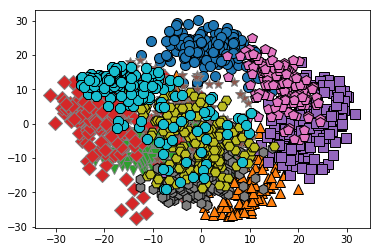

In [32]:
l = mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1], digits.target)

In [4]:
#223
from sklearn.manifold import TSNE
digits_tsne = TSNE().fit_transform(digits.data)

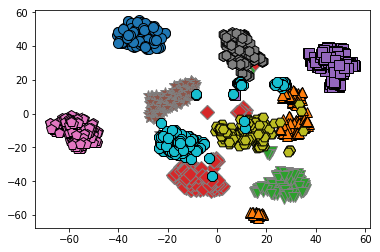

In [10]:
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], digits.target)

In [11]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=10).fit(digits_tsne)

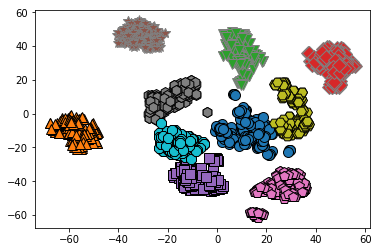

In [15]:
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], km.predict(digits_tsne))

 225 군집(clustering) - 분류, 이상치 검출(Abnormal Detection)
- k 평균 군집
- 병합 군집
- DBSCAN (Density based spatial clustering Application Noise) 밀도가 높은 공간    

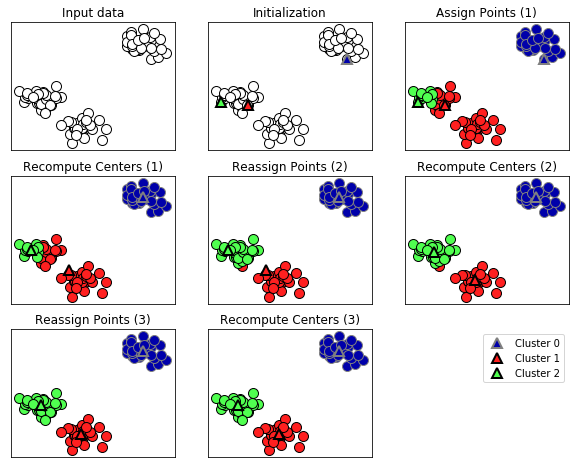

In [18]:
mglearn.plots.plot_kmeans_algorithm()

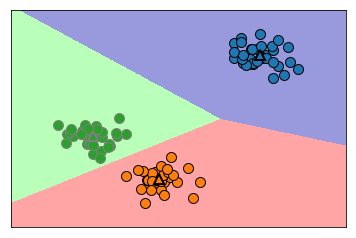

In [19]:
mglearn.plots.plot_kmeans_boundaries()

In [23]:
from sklearn.datasets import make_blobs
x, y = make_blobs() #연습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [47]:
from sklearn.cluster import KMeans

In [81]:
km = KMeans(n_clusters=3).fit(x) #x 를 3개로 그룹화(cluster)

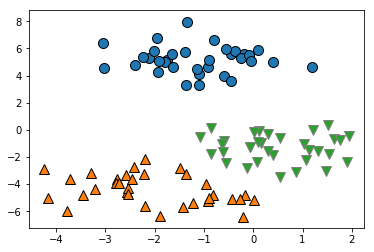

In [82]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], km.predict(x))

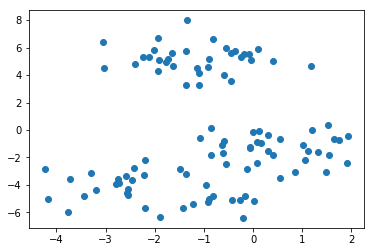

In [68]:
l = plt.scatter(x[:,0],x[:,1])

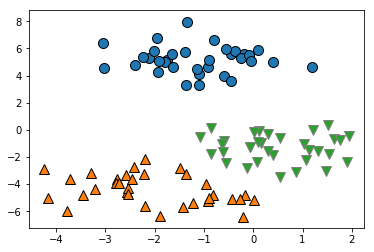

In [52]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], y)

digits 에 적용해보세요
- t-SNE 로 2개의 차원으로 축소합니다
- 그 데이터로 k-Means 를 fit 합니다. k=10
- k-Means 의 예측을 산점도에서 표시합니다

In [83]:
from sklearn.manifold import TSNE
digits_tsne = TSNE().fit_transform(digits.data)

In [90]:
km = KMeans(n_clusters=10).fit(digits_tsne)

In [91]:
predict_group = km.predict(digits_tsne)

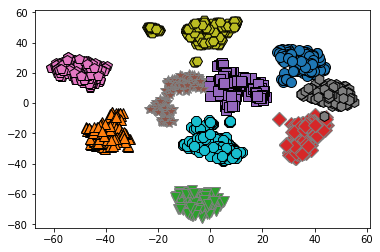

In [92]:
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], predict_group)

한국 프로야구 10개팀 클러스터링

In [113]:
import pandas as pd
url = 'http://www.kbreport.com' #다른 이름으로 저장
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [114]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [115]:
baseball = tables[0]

In [116]:
#base = baseball.set_index('팀명',inplace=True)#return 없이 자체적으로 바꾸기, 2번 실행하면 에러
base = baseball.set_index('팀명')

In [118]:
base.dtypes

순위       int64
승        int64
무        int64
패        int64
승률     float64
게임차    float64
득점       int64
실점       int64
연속      object
dtype: object

In [121]:
data = base.drop(columns='연속')
data.shape

(10, 8)

In [127]:
#2차원으로 변환한 후 k개로 클러스터링 
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [131]:
#k means 로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

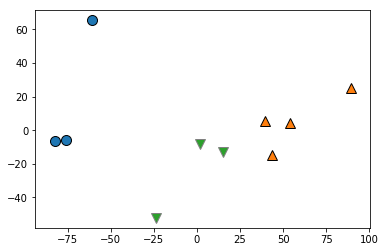

In [132]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)

In [122]:
data

,순위,승,무,패,승률,게임차,득점,실점
팀명,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342
두산,2,54,0,36,0.600,6.0,440,346
Hero,3,54,0,37,0.593,6.5,500,387
LG,4,49,1,38,0.563,9.5,377,377
NC,5,42,1,44,0.488,16.0,409,415
KT,6,42,1,47,0.472,17.5,407,456
삼성,7,37,1,49,0.430,21.0,400,424
KIA,8,36,1,52,0.409,23.0,401,467
한화,9,34,0,53,0.391,24.5,388,449


머신러닝 저장소 - 3위  와인 데이터 

와인의 질, 컬러, 알콜 도수 등을 측정 - > 원산지 (3군데) 를 추정하는 문제